In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
pwd

'C:\\Users\\18644\\Desktop\\THINKFUL\\Data Science Bootcamp\\UNIT 2\\Lesson 2'

In [10]:
amazon_raw = pd.read_csv('amazon_cells_labelled.txt', delimiter = '\t', header = None)
amazon_raw.columns = ('text', 'sentiment')


In [11]:
amazon_raw.head()

,text,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [12]:
# Kewword for reviews
keywords = ['bad', 'waste', 'useless', 'poor', 'not good', 'good', 'excellent', 'great', 
            'impressed', 'quality', 'hate','problems', 'dissapointed', 'unhappy']

for key in keywords:
    amazon_raw[str(key)] = amazon_raw.text.str.contains(
    str(key),
       case = False)

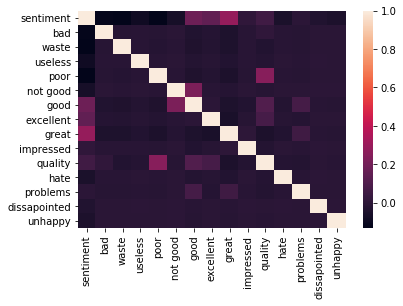

In [13]:
# showing independence among the selected variables
sns.heatmap(amazon_raw.corr())

In [14]:
# x and y values
data = amazon_raw[keywords]
target = amazon_raw['sentiment']

In [15]:
# our data is binary and hence we import Bernoulli classifier
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)
print('Number of mislabeled points out of total {} points : {}'.format(
data.shape[0],
(target != y_pred).sum()
))


Number of mislabeled points out of total 1000 points : 334


In [16]:
# Repeating with imdb data
imdb_raw = pd.read_csv('imdb_labelled.txt', delimiter = '\t', header = None)
imdb_raw.columns = ('text', 'sentiment')

# columns to identify if keywords in review
for key in keywords:
    imdb_raw[str(key)] = imdb_raw.text.str.contains(
    str(key),
    case = False)

# x and y values
data = imdb_raw[keywords]
target = imdb_raw['sentiment']


from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)
print('Number of mislabeled points out of total {} points: {}'.format(
data.shape[0],
(target != y_pred).sum()
))


Number of mislabeled points out of total 748 points: 291


In [17]:
# Repeating with yelp data
yelp_raw = pd.read_csv('yelp_labelled.txt', delimiter = '\t', header = None)
yelp_raw.columns = ('text', 'sentiment')

#Columns to identify the keywords in reviews
for key in keywords:
    yelp_raw[str(key)] = yelp_raw.text.str.contains(
    str(key),
    case = False)
    
# x and y values
data = yelp_raw[keywords]
target = yelp_raw['sentiment']

from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)
print('Number of mislabeled points out of total {} points:{}'. format(
data.shape[0],
(target != y_pred).sum()
))


Number of mislabeled points out of total 1000 points:376
